# Experiment plotting

This notebook contains the code for plotting results for the different experiments.
When run for the first time for a town, condensed summary files are being created which strongly speed up subsequent generations of plots from the same summaries. It is possible to create the plots only from the condensed summaries located in 'summaries/condensed_summaries'.
Note that this works for all experiments but the Rt plots, which still require the full summary file.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import pickle
import itertools
from lib.measures import *
from lib.experiment import Experiment, Plot, Result, get_properties, load_summary_list, load_summary
from lib.data import collect_data_from_df
from lib.calibrationSettings import calibration_lockdown_dates, calibration_start_dates, calibration_mob_paths
from lib.calibrationFunctions import get_calibrated_params, downsample_cases
import lib.plot as lib_plot
from lib.plot import Plotter
import matplotlib.pyplot as plt
from lib.summary import load_condensed_summary, get_tracing_probability
from matplotlib import colors
import matplotlib
from collections import defaultdict

In [3]:
commithash = '6bbe7a3'

baseline_colors = ['#31a354', '#74c476'] # '#006d2c',
spect_colors = ['#08519c', '#3182bd', '#6baed6', '#bdd7e7']
pancast_colors = ['#bd0026', '#f03b20', '#fd8d3c', '#fecc5c', '#ffffb2']

# Social distancing

In [4]:
def plot_relative_reduction(*, country, area, mode, ps_adoption, show_reduction=True, 
                            colors=None, log_yscale=False, figsize=None, ylim=None, 
                            box_plot=False, legend_is_left=True,
                            show_significance=None, sig_options=None, commithash=None):
    
    ps_adoption = np.sort(ps_adoption)
    
    if figsize is None:
        figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL
        
    if mode == 'r_eff':
        if area == 'TU':
            from lib.settings.town_settings_tubingen import town_population
        elif area == 'BE':
            from lib.settings.town_settings_bern import town_population
        else:
            raise NotImplementedError('Specify town population')
    else:
        town_population = None
        
        
    if ylim is None:
        if mode == 'r_eff' and show_reduction:
            ylim = (0.0, 50)
        elif mode == 'r_eff' and not show_reduction:
            ylim= (1.0, 3.7)
            
    
    plot_filename = (f'comparison-{mode}-{country}-{area}'
                    f'-reduction={show_reduction}'
                    f'-box_plot={box_plot}')
    paths = [  
                [f'lockdown-{country}-{area}-{commithash}/'
                 f'lockdown-{country}-{area}'
                 f'-p_compliance={p_adoption}'
                 '.pk' for p_adoption in ps_adoption],
                
                [f'k-groups-{country}-{area}-{commithash}/'
                 f'k-groups-{country}-{area}'
                 f'-K_groups=2-p_compliance={p_adoption}'
                 '.pk' for p_adoption in ps_adoption],
        
        
                [f'vulnerable-groups-{country}-{area}-{commithash}/'
                 f'vulnerable-groups-{country}-{area}'
                 f'-p_compliance={p_adoption}'
                 '.pk' for p_adoption in ps_adoption],
                
#                 [f'conditional-measures-{country}-{area}-{commithash}/'
#                  f'conditional-measures-{country}-{area}'
#                  f'-max_incidence=50-p_compliance={p_adoption}'
#                  '.pk' for p_adoption in ps_adoption],
        
            ]
    
    colors = ['#31a354', '#08519c', '#bd0026', '#fd8d3c']
    
    titles = ['Everyone',
             'Alternating groups',
             'Vulnerable groups',
             'Conditional']

        
    baseline_path = (f'baseline-{country}-{area}-{commithash}/'
                     f'baseline-{country}-{area}'
                    '-expected_daily_base_expo_per100k=0.7142857142857143'
                     f'.pk')

    plotter = Plotter()
    plotter.compare_peak_reduction(path_list=paths, 
                                   baseline_path=baseline_path, 
                                   ps_adoption=ps_adoption,
                                   area_population=town_population,
                                   labels=titles,
                                   mode=mode,
                                   show_reduction=show_reduction,
                                   box_plot=box_plot,
                                   log_xscale=False,
                                   log_yscale=log_yscale,
                                   ylim=ylim,
                                   show_significance=show_significance,
                                   sig_options=sig_options,
                                   colors=colors,
                                   filename=plot_filename,
                                   figsize=figsize,
                                   figformat='neurips-double',
                                   legend_is_left=legend_is_left)


Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
(7,)
(3, 7)


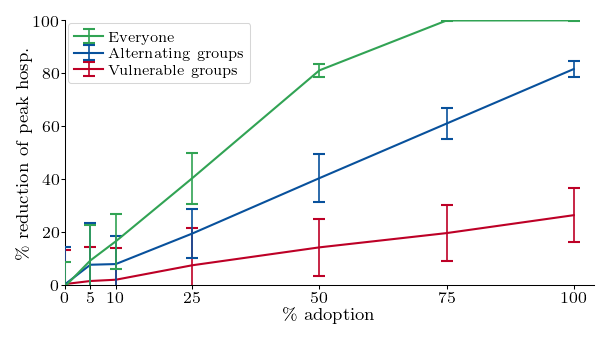

In [16]:
# Main results section, manual tracing panel

LINE_WIDTH = 7.0
COL_WIDTH = 3.333
figsize = (1.2 * LINE_WIDTH / 2, 1.2 * LINE_WIDTH / 3 * 4.5/6)

sig_options={'height': 1.0, 'same_height': False}

# plot_relative_reduction(
#     country='CH', 
#     area='BE', 
#     mode='cumu_infected',
#     ps_adoption=[1.0, 0.75, 0.5, 0.25, 0.1, 0.05, 0.0],
#     show_significance=False,
#     show_reduction=True,
#     log_yscale=False,
#     box_plot=False,
#     ylim=[0,100],
#     figsize=figsize,
#     commithash=commithash
# )

plot_relative_reduction(
    country='CH', 
    area='BE', 
    mode='hosp',
    ps_adoption=[1.0, 0.75, 0.5, 0.25, 0.1, 0.05, 0.0],
    show_significance=False,
    show_reduction=True,
    log_yscale=False,
    box_plot=False,
    ylim=[0,100],
    figsize=figsize,
    commithash=commithash
)

Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


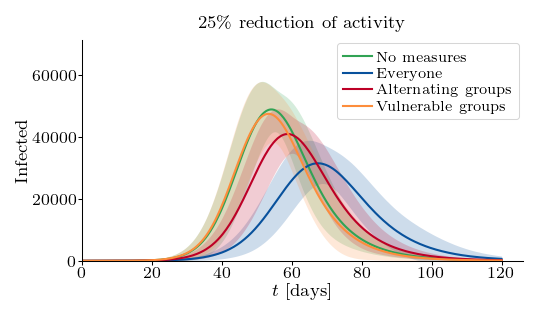

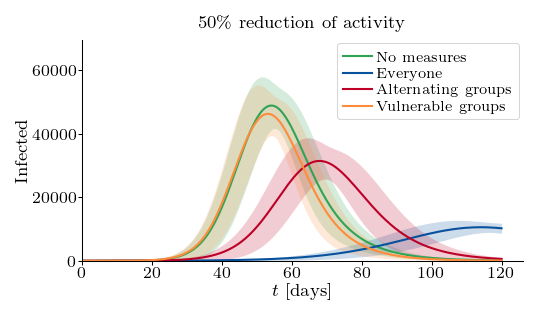

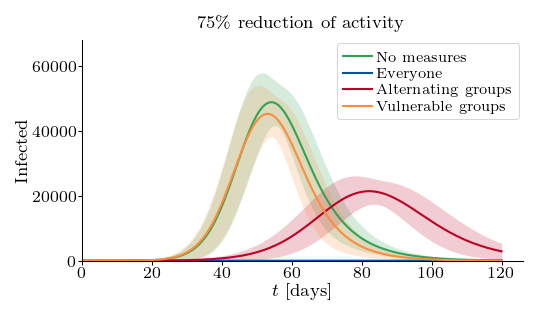

In [6]:
def plot_over_time(*, country, area, quantity, mode, p_adoption=0.25, 
                                  ymax=None, commithash=None):
    
    paths = [  f'baseline-{country}-{area}-{commithash}/'
                     f'baseline-{country}-{area}'
                    '-expected_daily_base_expo_per100k=0.7142857142857143'
                     f'.pk',
             
                f'lockdown-{country}-{area}-{commithash}/'
                f'lockdown-{country}-{area}'
                f'-p_compliance={p_adoption}'
                '.pk',

                f'k-groups-{country}-{area}-{commithash}/'
                 f'k-groups-{country}-{area}'
                 f'-K_groups=2-p_compliance={p_adoption}'
                 '.pk',


                f'vulnerable-groups-{country}-{area}-{commithash}/'
                f'vulnerable-groups-{country}-{area}'
                f'-p_compliance={p_adoption}'
                '.pk',

    #                 f'conditional-measures-{country}-{area}-{commithash}/'
    #                  f'conditional-measures-{country}-{area}'
    #                  f'-max_incidence=50-p_compliance={p_adoption}'
    #                  '.pk',

    ]
    
    labels = ['No measures',
            'Everyone',
             'Alternating groups',
             'Vulnerable groups',
             'Conditional']
    # colors = [baseline_colors[0], spect_colors[0], spect_colors[1], spect_colors[2]]
    
    colors = ['#31a354', '#08519c', '#bd0026', '#fd8d3c']
    
    plot_filename = f'{mode}-{quantity}-over-time-p_adoption_{p_adoption}'
    plotter = Plotter()

    plotter.compare_quantity(
        paths, 
        labels=labels,
        quantity=quantity,
        mode=mode,
        ymax=ymax,
        titles=f'{int(p_adoption *100)}\% reduction of activity',
        colors=colors,
        filename=plot_filename, 
        figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
        figformat='neurips-double',
        legend_is_left=False)
    

plot_over_time(
    country='CH', 
    area='BE',
    quantity='infected',    # Allowed values: ['infected', 'hosp', 'dead']
    mode='total',           # Allowed values: ['total', 'daily', 'cumulative', 'weekly incidence']
    ymax=None,
    p_adoption=0.25,
    commithash=commithash
)

plot_over_time(
    country='CH', 
    area='BE',
    quantity='infected',    # Allowed values: ['infected', 'hosp', 'dead']
    mode='total',           # Allowed values: ['total', 'daily', 'cumulative', 'weekly incidence']
    ymax=None,
    p_adoption=0.5,
    commithash=commithash
)

plot_over_time(
    country='CH', 
    area='BE',
    quantity='infected',    # Allowed values: ['infected', 'hosp', 'dead']
    mode='total',           # Allowed values: ['total', 'daily', 'cumulative', 'weekly incidence']
    ymax=None,
    p_adoption=0.75,
    commithash=commithash
)

# Site closures

Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


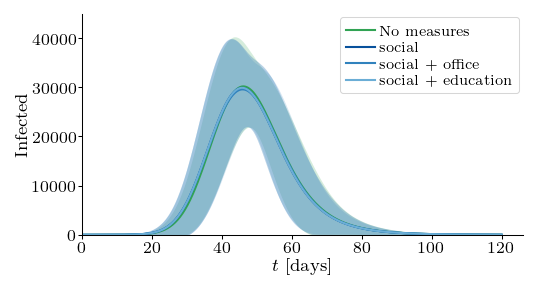

In [7]:
def plot_over_time_closures(*, country, area, quantity, mode,
                                  ymax=None, commithash=None):
    
    paths = [f'baseline-{country}-{area}-{commithash}/'
             f'baseline-{country}-{area}'
            '-expected_daily_base_expo_per100k=0.7142857142857143'
             f'.pk',
                
                f'site-closures-{country}-{area}-{commithash}/'
                f'site-closures-{country}-{area}-closures=s_o_c_i_a_l'
                '.pk',
        
                f'site-closures-{country}-{area}-{commithash}/'
                f'site-closures-{country}-{area}-closures=o_f_f_i_c_e'
                '.pk',
        
                f'site-closures-{country}-{area}-{commithash}/'
                f'site-closures-{country}-{area}-closures=s_o_c_i_a_l'
                '.pk',

    ]
    
    labels = ['No measures',
            'social',
             'social + office',
             'social + education',
             'social + office + education']
    
    colors = [baseline_colors[0], spect_colors[0], spect_colors[1], spect_colors[2]]
    
    plot_filename = f'site-closures-{mode}-{quantity}-over-time'
    plotter = Plotter()

    plotter.compare_quantity(
        paths, 
        labels=labels,
        quantity=quantity,
        mode=mode,
        ymax=ymax,
        colors=colors,
        filename=plot_filename, 
        figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
        figformat='neurips-double',
        legend_is_left=False)
    

plot_over_time_closures(
    country='CH', 
    area='JU',
    quantity='infected',    # Allowed values: ['infected', 'hosp', 'dead']
    mode='total',           # Allowed values: ['total', 'daily', 'cumulative', 'weekly incidence']
    ymax=None,
    commithash=commithash
)

# Contact tracing

In [8]:
def plot_relative_reduction_tracing(*, country, area, mode, ps_adoption, ps_social_distancing,
                                    show_reduction=True, 
                            colors=None, log_yscale=False, figsize=None, ylim=None, 
                            box_plot=False, legend_is_left=True,
                            show_significance=None, sig_options=None, commithash=None):
    
    ps_adoption = np.sort(ps_adoption)
    
    if figsize is None:
        figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL
        
    if mode == 'r_eff':
        if area == 'TU':
            from lib.settings.town_settings_tubingen import town_population
        elif area == 'BE':
            from lib.settings.town_settings_bern import town_population
        else:
            raise NotImplementedError('Specify town population')
    else:
        town_population = None
        
        
    if ylim is None:
        if mode == 'r_eff' and show_reduction:
            ylim = (0.0, 50)
        elif mode == 'r_eff' and not show_reduction:
            ylim= (1.0, 3.7)
            
    
    plot_filename = (f'tracing-comparison-{mode}-{country}-{area}'
                    f'-reduction={show_reduction}'
                    f'-box_plot={box_plot}')
    
    paths = []
    labels = []
    
    for p_social_distancing in ps_social_distancing:
        paths.append([f'tracing-social-distancing-{country}-{area}-{commithash}/'
                     f'tracing-social-distancing-{country}-{area}'
                      f'-p_tracing={p_adoption}'
                      f'-p_social_distancing={p_social_distancing}'
                      f'-test_lag=0.5'
                      f'-tracing_threshold=0.007584090158343315'
                     '.pk' for p_adoption in ps_adoption])
    
    
        labels.append(f'{int(p_social_distancing*100)}\% social distancing')

        
    baseline_path = (f'baseline-{country}-{area}-6bbe7a3/'
                     f'baseline-{country}-{area}'
                    '-expected_daily_base_expo_per100k=0.7142857142857143'
                     f'.pk')

    plotter = Plotter()
    plotter.compare_peak_reduction(path_list=paths, 
                                   baseline_path=baseline_path, 
                                   ps_adoption=ps_adoption,
                                   area_population=town_population,
                                   labels=labels,
                                   mode=mode,
                                   show_reduction=show_reduction,
                                   box_plot=box_plot,
                                   log_xscale=True,
                                   log_yscale=log_yscale,
                                   ylim=ylim,
                                   show_significance=show_significance,
                                   sig_options=sig_options,
                                   colors=colors,
                                   filename=plot_filename,
                                   figsize=figsize,
                                   figformat='neurips-double',
                                   legend_is_left=legend_is_left)

In [9]:
# # Main results section, manual tracing panel

# LINE_WIDTH = 7.0
# COL_WIDTH = 3.333
# figsize = (1.2 * LINE_WIDTH / 2, 1.2 * LINE_WIDTH / 3 * 4.5/6)

# sig_options={'height': 1.0, 'same_height': False}

# plot_relative_reduction_tracing(
#     country='CH', 
#     area='BE', 
#     mode='cumu_infected',
#     ps_adoption=[0.75, 0.5, 0.25, 0.1],
#     ps_social_distancing=[0.5, 0.25, 0.1, 0.0],
#     show_significance=False,
#     show_reduction=True,
#     log_yscale=True,
#     sig_options=sig_options,
#     box_plot=True,
#     ylim=None,
#     figsize=figsize,
#     commithash='64bcf31'
# )

Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previou

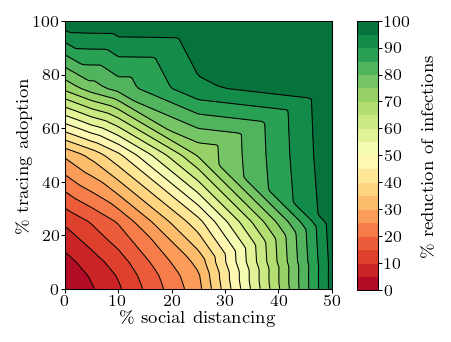

In [10]:
def plot_relative_quantity_heatmap(*, country, area, mode,
    ps_adoption, ps_social_distancing, interpolate, cmap, commithash):
    
    filename = (
        f'tracing-social-distancing-heatmap'
    )
    
    paths = [(p_social_distancing, p_adoption, 
              (f'tracing-social-distancing-{country}-{area}-{commithash}/'
                 f'tracing-social-distancing-{country}-{area}'
                  f'-p_tracing={p_adoption}'
                  f'-p_social_distancing={p_social_distancing}'
                  f'-test_lag=0.5'
                  f'-tracing_threshold=0.007584090158343315'
                 '.pk'))
             for p_adoption in ps_adoption 
             for p_social_distancing in ps_social_distancing]
    
    paths = (paths,)
    
    baseline_path = (f'tracing-social-distancing-{country}-{area}-{commithash}/'
                     f'tracing-social-distancing-{country}-{area}'
                     f'-p_tracing=0.0'
                     f'-p_social_distancing=0.0'
                     f'-test_lag=0.5'
                     f'-tracing_threshold=0.007584090158343315'
                     f'.pk')

    
    LINE_WIDTH = 7.0
    COL_WIDTH = 3.333
    figsize = (LINE_WIDTH / 2.5, LINE_WIDTH / 3)


    # plots
    plotter = Plotter()
    plotter.relative_quantity_heatmap_acm(
        xlabel=r'\% social distancing',
        ylabel=r'\% tracing adoption',
        path_labels=['placed randomly', 'by integr. visit time'],
        paths=paths, 
        mode=mode,
        zmax=100,
        baseline_path=baseline_path,
        filename=filename, 
#         figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
        figsize=figsize, 
        figformat='neurips-double',
        interpolate=interpolate,
        width_ratio=1,
        cmap=cmap,
    )

ps_adoption = [1.0, 0.75, 0.5, 0.25, 0.1, 0.05, 0.0]
# ps_adoption = [1.0, 0.0]

ps_social_distancing=[0.5, 0.25, 0.1, 0.05, 0.0]
# ps_social_distancing=[0.5, 0.0]

for mode in ["cumu_infected"]:
    plot_relative_quantity_heatmap(
        mode=mode,
        country='CH', 
        area='BE', 
        ps_adoption=ps_adoption[::-1],
        ps_social_distancing=ps_social_distancing[::-1],
        interpolate='linear',
        cmap=plt.cm.RdYlGn,
        commithash='64bcf31'
    )

Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.


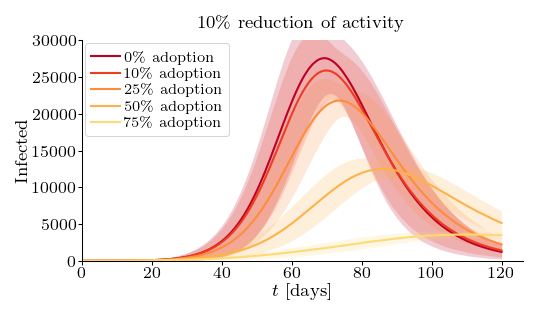

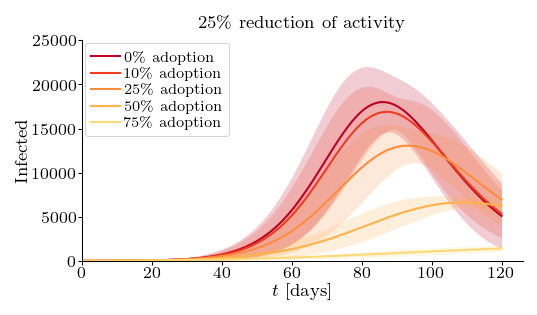

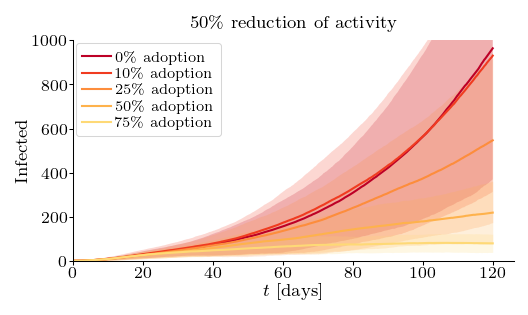

In [11]:
def plot_over_time_tracing(*, country, area, quantity, mode, ps_adoption, p_social_distancing, 
                                  ymax=None, commithash=None):
    
    
    labels = []
    paths = [f'tracing-social-distancing-{country}-{area}-{commithash}/'
                 f'tracing-social-distancing-{country}-{area}'
                  f'-p_tracing={p_adoption}'
                  f'-p_social_distancing={p_social_distancing}'
                  f'-test_lag=0.5'
                  f'-tracing_threshold=0.007584090158343315'
                 '.pk' for p_adoption in ps_adoption]
    
    
    labels = [f'{int(p_adoption*100)}\% adoption' for p_adoption in ps_adoption]
    
    colors = [pancast_colors[0], spect_colors[3], spect_colors[2], spect_colors[1], spect_colors[0]]
    
    # colors = ['#bdd7e7', '#6baed6', '#3182bd', '#08519c', pancast_colors[0]][::-1]
    colors = ['#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'][::-1]

    
    plot_filename = f'{mode}-{quantity}-over-time-p_social_distancing={p_social_distancing}'
    plotter = Plotter()

    plotter.compare_quantity(
        paths, 
        labels=labels,
        quantity=quantity,
        mode=mode,
        ymax=ymax,
        titles=f'{int(p_social_distancing *100)}\% reduction of activity',
        colors=colors,
        filename=plot_filename, 
        figsize=lib_plot.FIG_SIZE_FULL_PAGE_DOUBLE_ARXIV_TALL, 
        figformat='neurips-double',
        legend_is_left=True)
    

plot_over_time_tracing(
    country='CH', 
    area='BE',
    quantity='infected',    # Allowed values: ['infected', 'hosp', 'dead']
    mode='total',           # Allowed values: ['total', 'daily', 'cumulative', 'weekly incidence']
    ymax=30000,
    ps_adoption=[0.0, 0.1, 0.25, 0.5, 0.75],
    p_social_distancing=0.1,
    commithash='64bcf31',
)

plot_over_time_tracing(
    country='CH', 
    area='BE',
    quantity='infected',    # Allowed values: ['infected', 'hosp', 'dead']
    mode='total',           # Allowed values: ['total', 'daily', 'cumulative', 'weekly incidence']
    ymax=25000,
    ps_adoption=[0.0, 0.1, 0.25, 0.5, 0.75],
    p_social_distancing=0.25,
    commithash='64bcf31',
)

plot_over_time_tracing(
    country='CH', 
    area='BE',
    quantity='infected',    # Allowed values: ['infected', 'hosp', 'dead']
    mode='total',           # Allowed values: ['total', 'daily', 'cumulative', 'weekly incidence']
    ymax=1000,
    ps_adoption=[0.0, 0.1, 0.25, 0.5, 0.75],
    p_social_distancing=0.5,
    commithash='64bcf31',
)

# Rt over time

Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Loaded previously extracted data.
Save: plots/rt-tracing.pdf
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.


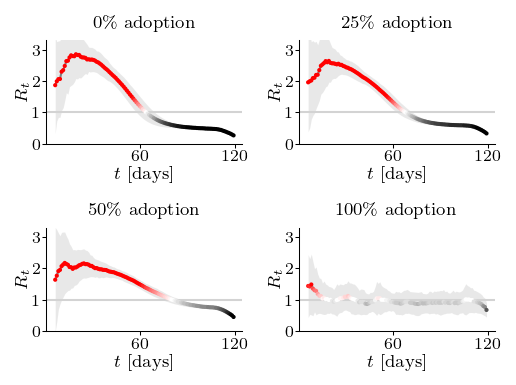

In [14]:
def plot_rt_panel(experiment, ps_adoption, p_social_distancing=0.25):
    
    country = 'CH'
    area = 'BE'
    
    assert len(ps_adoption) == 4
    paths = [f'tracing-social-distancing-{country}-{area}-64bcf31/'
                 f'tracing-social-distancing-{country}-{area}'
                  f'-p_tracing={p_adoption}'
                  f'-p_social_distancing={p_social_distancing}'
                  f'-test_lag=0.5'
                  f'-tracing_threshold=0.007584090158343315'
                 '.pk' for p_adoption in ps_adoption]
    
    labels = [f'{int(p_adoption *100)}\% adoption' for p_adoption in ps_adoption]
        
#     if experiment == 'main-manual':
#         labels = [f'Only manual tracing', 
#                   f'SPECTS, {int(p_adoption*100)}\% adopt.',
#                  f'PanCast(25\%), {int(p_adoption*100)}\% adopt.',
#                  f'PanCast(100\%), {int(p_adoption*100)}\% adopt.']
#     elif experiment == 'no-manual':
#         labels = [f'No contact tracing', 
#                   f'SPECTS, {int(p_adoption*100)}\% adopt.',
#                   f'PanCast(25\%), {int(p_adoption*100)}\% adopt.',
#                   f'PanCast(100\%), {int(p_adoption*100)}\% adopt.']
#     elif experiment == 'interoperation':
#         labels = [f'Only manual tracing', 
#                   f'0\% beacons, {int(p_adoption*100)}\% adopt.',
#                   f'25\% beacons, {int(p_adoption*100)}\% adopt.',
#                   f'100\% beacons, {int(p_adoption*100)}\% adopt.']

    
#     names = [f'baseline', 
#          f'SPECTS-p_adoption={p_adoption}',
#          f'beacons=0.25-p_adoption={p_adoption}',
#          f'beacons=0.100-p_adoption={p_adoption}',
#         ]
        
    #_, filename = os.path.split(path)
    plot_filename = 'rt-tracing'


    LINE_WIDTH = 7.0
    COL_WIDTH = 3.333
    figsize = (0.5*LINE_WIDTH,  1.5 * LINE_WIDTH / 3 * 4.5/6)
    
    
    # plot
    plotter = Plotter()
    plotter.plot_daily_nbinom_rts_panel(
        paths=paths, 
        titles=labels,
        filename=plot_filename,
        cmap_range=(0.5, 1.5),
        figsize=figsize,
        figformat='neurips-double',
        ymax=3.3,
        #xlim=(0, 185),
        x_axis_dates=False,
        show_legend=False,
        subplots_adjust={'bottom':0.2, 'top': 0.98, 'left': 0.12, 'right': 0.96},
    )

plot_rt_panel(experiment='main-manual', 
             ps_adoption=[0.0, 0.25, 0.5, 1.0],
             p_social_distancing=0.1)


!bash crop_pdfs.sh plots/rt-*.pdf

In [13]:
!bash crop_pdfs.sh plots/*.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `tmp.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==>